In [1]:
import axon

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
nn = axon.Network([4, 1], [axon.activation.Identity], axon.loss.MSE)

In [4]:
data = np.random.rand(1000, 4)
labels = np.sum(data, axis = 1)[np.newaxis].T

In [5]:
losses = nn.train(data, labels, axon.Optimizer.AdaDelta, 0.03)

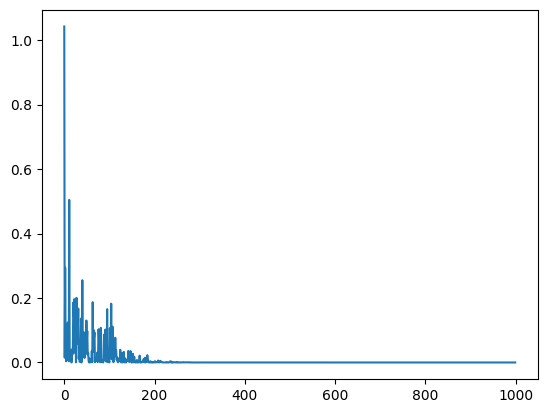

In [6]:
plt.plot(losses)
plt.show()

In [7]:
input = np.random.rand(1, 4)
input

array([[0.15406456, 0.05149404, 0.39469362, 0.65779879]])

In [8]:
np.sum(input)

1.258051015631906

In [9]:
nn.predict(input)

array([[[1.25805102]]])

In [10]:
nagnn = axon.Network([4, 1], [axon.activation.Identity], axon.loss.MSE)

In [11]:
naglosses = nagnn.train(data, labels, axon.Optimizer.NAG, 0.03)

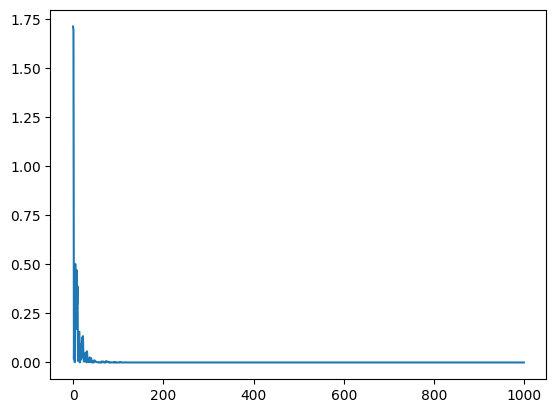

In [12]:
plt.plot(naglosses)
plt.show()

In [13]:
nagnn.predict(input)

array([[[1.25805102]]])

In [14]:
adamnn = axon.Network([4, 1], [axon.activation.Identity], axon.loss.MSE)

In [15]:
adamlosses = adamnn.train(data, labels, axon.Optimizer.AdaM, 0.03)

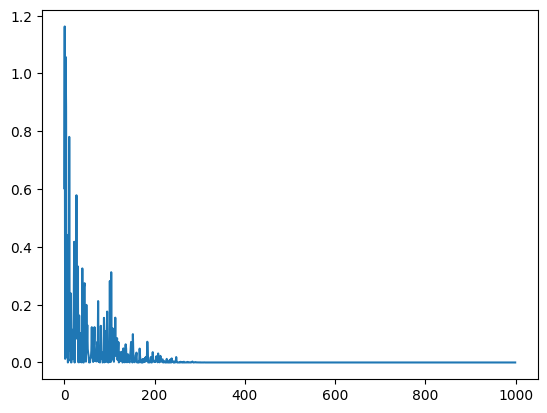

In [16]:
plt.plot(adamlosses)
plt.show()

Testing Performance on Cross Product

In [17]:
data = np.random.rand(1000000, 6)
l, r = np.hsplit(data, 2)
labels = np.cross(l, r, axis = 1)

In [18]:
adamcrossnn = axon.Network([6, 12, 12, 6, 3], [axon.activation.LeakyRelu, axon.activation.LeakyRelu, axon.activation.LeakyRelu, axon.activation.Identity], axon.loss.MSE)

In [19]:
adamcrosslosses = adamcrossnn.train(data, labels, axon.Optimizer.AdaM, 0.03)

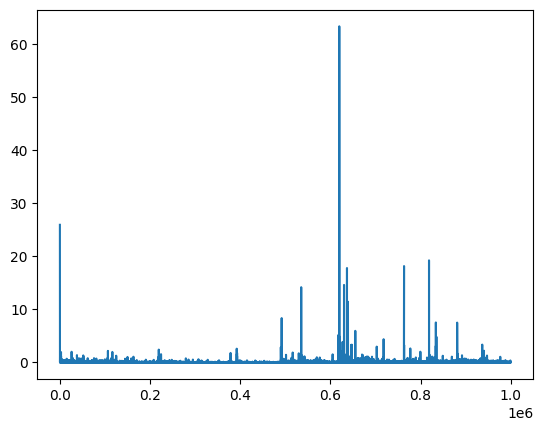

In [20]:
plt.plot(adamcrosslosses)
plt.show()

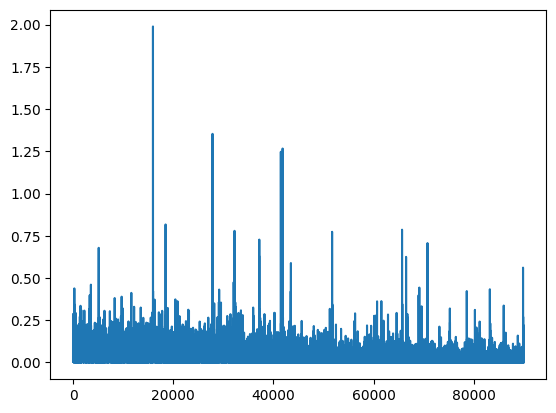

In [21]:
plt.plot(adamcrosslosses[10000:100000])
plt.show()

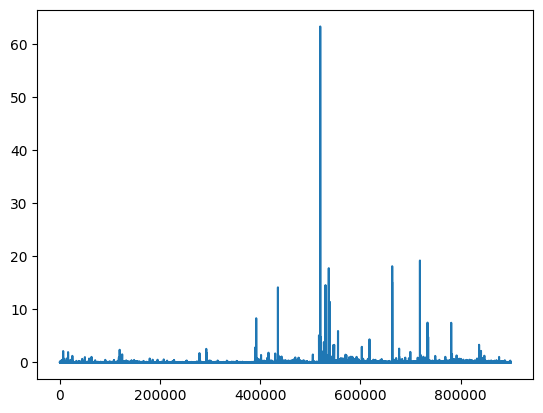

In [22]:
plt.plot(adamcrosslosses[100000:1000000])
plt.show()

In [35]:
vecs = np.random.rand(1, 6)
lvec, rvec = np.hsplit(vecs, 2)

In [36]:
np.cross(lvec, rvec)

array([[-0.00426854,  0.63725209, -0.19220968]])

In [37]:
adamcrossnn.predict(vecs)

array([[[-0.01388427],
        [ 0.59750365],
        [-0.29989548]]])

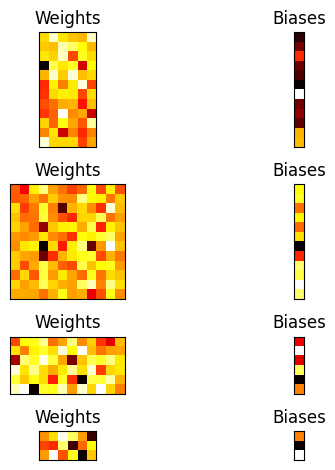

In [26]:
adamcrossnn.visualize()

In [27]:
adamcrossnn.write_to("AdamCrossNN")

In [28]:
copy = axon.Network.read("AdamCrossNN")

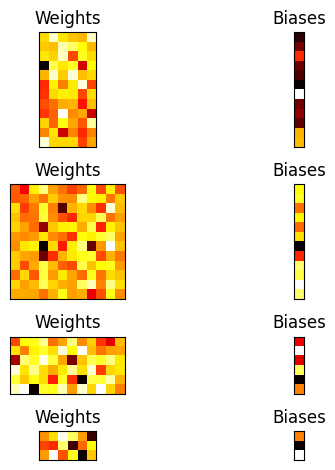

In [29]:
copy.visualize()